# Credit Risk Prediction

## Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.core.display import HTML
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import warnings
warnings.filterwarnings("ignore")

# Feature Description

- person_age: Age of the individual applying for the loan.
- person_income: Annual income of the individual.
- person_home_ownership: Type of home ownership of the individual.
  - rent: The individual is currently renting a property.
  - mortgage: The individual has a mortgage on the property they own.
  - own: The individual owns their home outright.
  - other: Other categories of home ownership that may be specific to the dataset.
  
- person_emp_length: Employment length of the individual in years.
- loan_intent: The intent behind the loan application.
- loan_grade: The grade assigned to the loan based on the creditworthiness of the borrower.
  - A: The borrower has a high creditworthiness, indicating low risk.
  - B: The borrower is relatively low-risk, but not as creditworthy as Grade A.
  - C: The borrower's creditworthiness is moderate.
  - D: The borrower is considered to have higher risk compared to previous grades.
  - E: The borrower's creditworthiness is lower, indicating a higher risk.
  - F: The borrower poses a significant credit risk.
  - G: The borrower's creditworthiness is the lowest, signifying the highest risk.
  
- loan_amnt: The loan amount requested by the individual.
- loan_int_rate: The interest rate associated with the loan.
- loan_status: Loan status, where 0 indicates non-default and 1 indicates default.
  - 0: Non-default - The borrower successfully repaid the loan as agreed, and there was no default.
  - 1: Default - The borrower failed to repay the loan according to the agreed-upon terms and defaulted on the loan.

- loan_percent_income: The percentage of income represented by the loan amount.
- cb_person_default_on_file: Historical default of the individual as per credit bureau records.
  - Y: The individual has a history of defaults on their credit file.
  - N: The individual does not have any history of defaults.

- cb_preson_cred_hist_length: The length of credit history for the individual.

# Read Data and EDA

In [41]:
data_original = pd.read_csv('credit_risk_dataset.csv')
df = pd.read_csv('credit_risk_dataset.csv')

In [42]:
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [43]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [45]:
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [46]:
df.loan_status.value_counts()

loan_status
0    25473
1     7108
Name: count, dtype: int64

In [47]:
df.duplicated().sum()

165

In [48]:
df_cor = df.select_dtypes(include=[np.number])
df_cor.corr()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
person_age,1.000000,0.173202,0.163106,0.050787,0.012580,-0.021629,-0.042411,0.859133
person_income,0.173202,1.000000,0.134268,0.266820,0.000792,-0.144449,-0.254471,0.117987
person_emp_length,0.163106,0.134268,1.000000,0.113082,-0.056405,-0.082489,-0.054111,0.144699
loan_amnt,0.050787,0.266820,0.113082,1.000000,0.146813,0.105376,0.572612,0.041967
loan_int_rate,0.012580,0.000792,-0.056405,0.146813,1.000000,0.335133,0.120314,0.016696
loan_status,-0.021629,-0.144449,-0.082489,0.105376,0.335133,1.000000,0.379366,-0.015529
loan_percent_income,-0.042411,-0.254471,-0.054111,0.572612,0.120314,0.379366,1.000000,-0.031690
cb_person_cred_hist_length,0.859133,0.117987,0.144699,0.041967,0.016696,-0.015529,-0.031690,1.000000


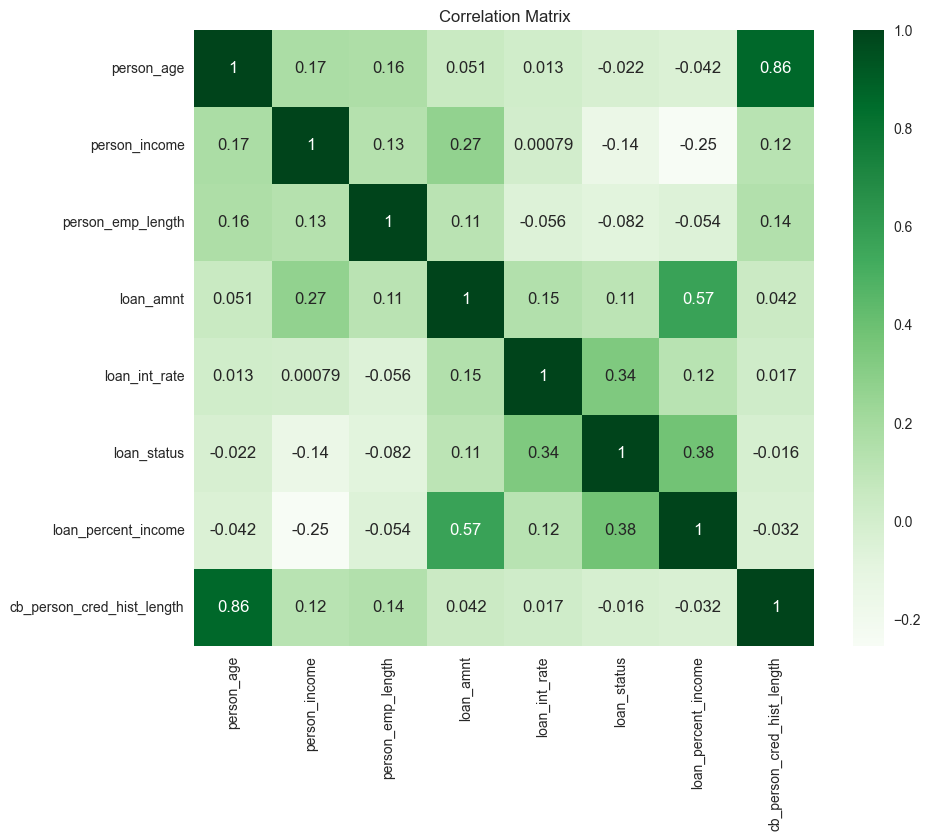

In [49]:
plt.figure(figsize=(10,8))
sns.heatmap(df_cor.corr(), annot=True, cmap="Greens")
plt.title("Correlation Matrix")
plt.show()

In [50]:
def multiTable(tables):
    return HTML('<table><tr style="background-color:#ddefdd;">' +
                ''.join(['<td>' + table._repr_html_() + '</td>' for table in tables]) +'</tr></table>')

In [51]:
nunique_df={var:pd.DataFrame(df[var].value_counts())
           for var in {'person_age', 'person_income', 'person_home_ownership',
           'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
           'loan_int_rate', 'loan_status', 'loan_percent_income',
           'cb_person_default_on_file', 'cb_person_cred_hist_length'}}

multiTable([nunique_df['person_age'],nunique_df['person_income'],nunique_df['person_home_ownership'],nunique_df['person_emp_length'],
             nunique_df['loan_intent'],nunique_df['loan_grade'],nunique_df['loan_amnt'],nunique_df['loan_int_rate'],nunique_df['loan_status'],
             nunique_df['loan_percent_income'],nunique_df['cb_person_default_on_file'],nunique_df['cb_person_cred_hist_length']])

,count
person_age,
23,3889
22,3633
24,3549
25,3037
26,2477
27,2138
28,1854
29,1687
30,1316


In [52]:
max_age = df['person_age'].max()
min_age = df['person_age'].min()

print("Max Age: ", max_age)
print("Min Age: ", min_age)

def age_group(arr):
    length = len(arr)
    for i in range(0,length-1):
        next = arr[i] + 1
        num = df['person_age'].between(next, arr[i+1]).sum()
        print("Number of people with age between ", next, " and ", arr[i+1], ": ", num)

age_group([0,18,26,36,46,56,80])

Max Age:  144
Min Age:  20
Number of people with age between  1  and  18 :  0
Number of people with age between  19  and  26 :  17829
Number of people with age between  27  and  36 :  11834
Number of people with age between  37  and  46 :  2360
Number of people with age between  47  and  56 :  434
Number of people with age between  57  and  80 :  117


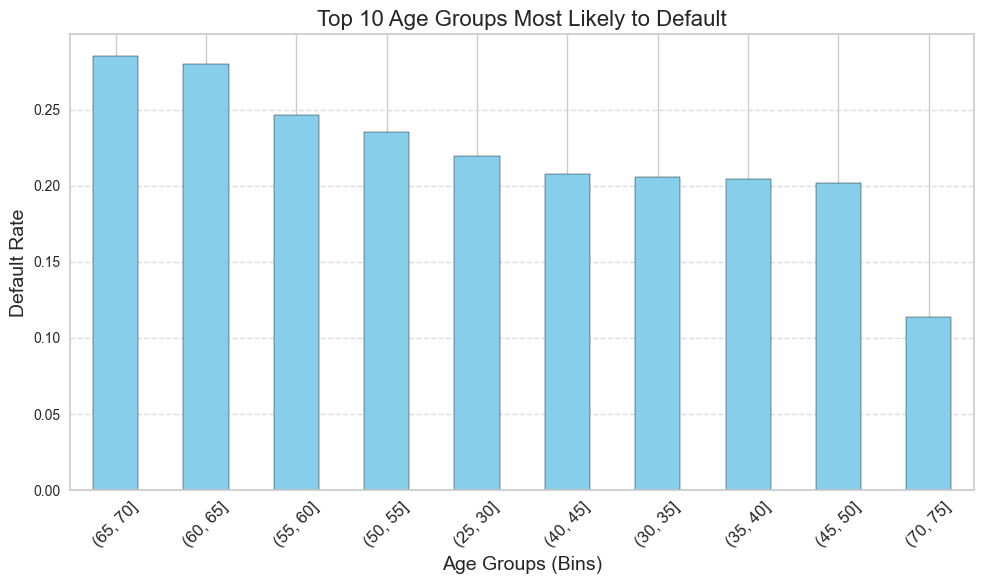

In [53]:
# Which age groups are most likely to default?
age_default_rate = df.groupby('person_age')['loan_status'].mean()

# Create bins to group age groups
df['age_bins'] = pd.cut(df['person_age'], bins=range(20, 81, 5))
age_bins_rate = df.groupby('age_bins')['loan_status'].mean()

# Simple smoothing with moving average
smoothed_rate = age_bins_rate.rolling(window=2, center=True).mean()

smoothed_rate_sort = smoothed_rate.sort_values(ascending = False).head(10)

plt.figure(figsize = (10,6))

smoothed_rate_sort.plot(kind='bar', color='skyblue', edgecolor='black')

# Add labels and title
plt.title('Top 10 Age Groups Most Likely to Default', fontsize=16)
plt.xlabel('Age Groups (Bins)', fontsize=14)
plt.ylabel('Default Rate', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


In [54]:
max_income = df['person_income'].max()
min_income = df['person_income'].min()

print("Max income: ", max_income)
print("Min income: ", min_income)

def income_group(arr):
    length = len(arr)
    for i in range(0,length-1):
        next = arr[i] + 1
        num = df['person_income'].between(next, arr[i+1]).sum()
        print("Number of people with income between ", next, " and ", arr[i+1], ": ", num)

income_group([0, 25000, 50000, 75000, 100000,float('inf')])

Max income:  6000000
Min income:  4000
Number of people with income between  1  and  25000 :  2469
Number of people with income between  25001  and  50000 :  11613
Number of people with income between  50001  and  75000 :  9622
Number of people with income between  75001  and  100000 :  4670
Number of people with income between  100001  and  inf :  4207


C:\Users\divya\AppData\Local\Temp\ipykernel_24692\3958710365.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  income_default_rate = df.groupby('income_bins')['loan_status'].mean()


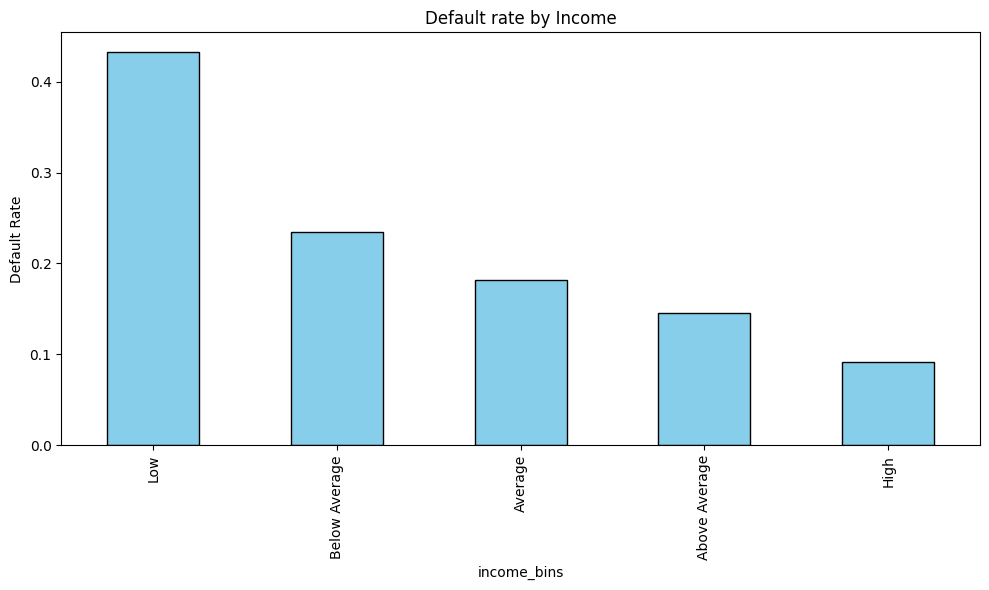

In [42]:
# plt.figure(figsize = (10,6))

# df['income_bins'] = pd.qcut(df['person_income'], q=5, labels=['Low', 'Below Average', 'Average', 'Above Average', 'High'])
# income_default_rate = df.groupby('income_bins')['loan_status'].mean()

# income_default_rate.plot(kind='bar', color='skyblue', edgecolor='black')

# # Add labels and title
# plt.title('Default rate by Income', fontsize=12)
# plt.ylabel('Default Rate', fontsize=10)

# # Show the plot
# plt.tight_layout()
# plt.show()


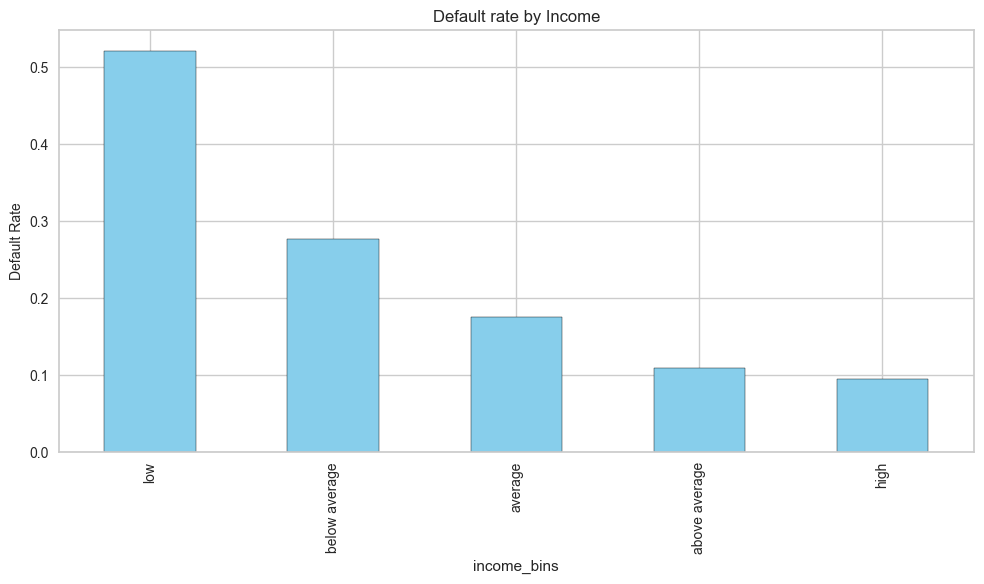

In [55]:
plt.figure(figsize = (10,6))

df['income_bins'] = pd.cut(df['person_income'],
                              bins=[0, 25000, 50000, 75000, 100000, float('inf')],
                              labels=['low', 'below average', 'average', 'above average', 'high'])
income_default_rate = df.groupby('income_bins')['loan_status'].mean()

income_default_rate.plot(kind='bar', color='skyblue', edgecolor='black')


plt.title('Default rate by Income', fontsize=12)
plt.ylabel('Default Rate', fontsize=10)


plt.tight_layout()
plt.show()

C:\Users\divya\AppData\Local\Temp\ipykernel_24692\1948216435.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  amt_default_rate = df.groupby('loan_amt_bins')['loan_status'].mean()


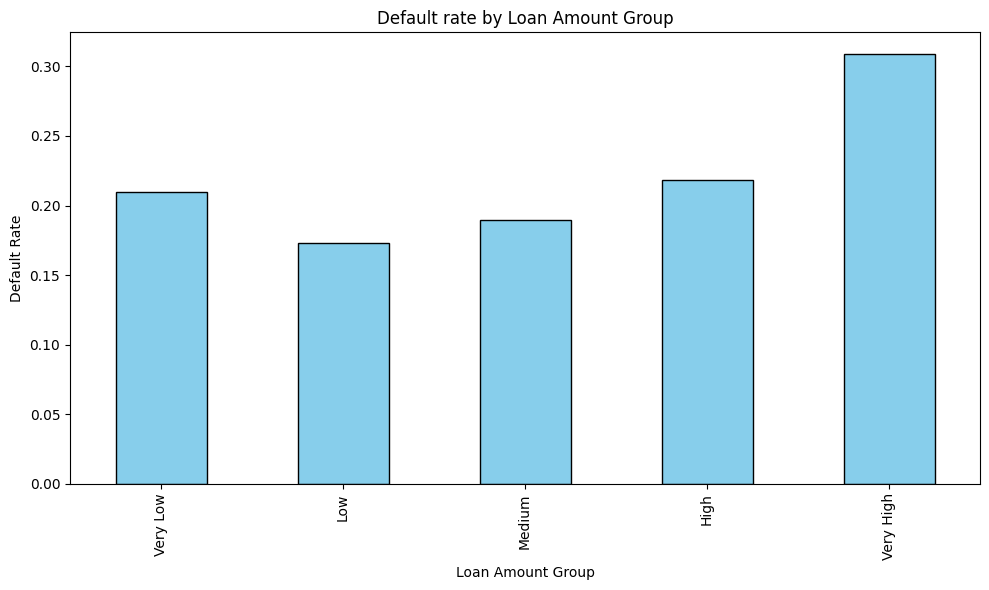

In [44]:
# df['loan_amt_bins'] = pd.qcut(df['loan_amnt'], q= 5, labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])
# amt_default_rate = df.groupby('loan_amt_bins')['loan_status'].mean()

# plt.figure(figsize = (10,6))

# amt_default_rate.plot(kind='bar', color='skyblue', edgecolor='black')

# # Add labels and title
# plt.title('Default rate by Loan Amount Group', fontsize=12)
# plt.xlabel("Loan Amount Group", fontsize=10)
# plt.ylabel('Default Rate', fontsize=10)

# # Show the plot
# plt.tight_layout()
# plt.show()


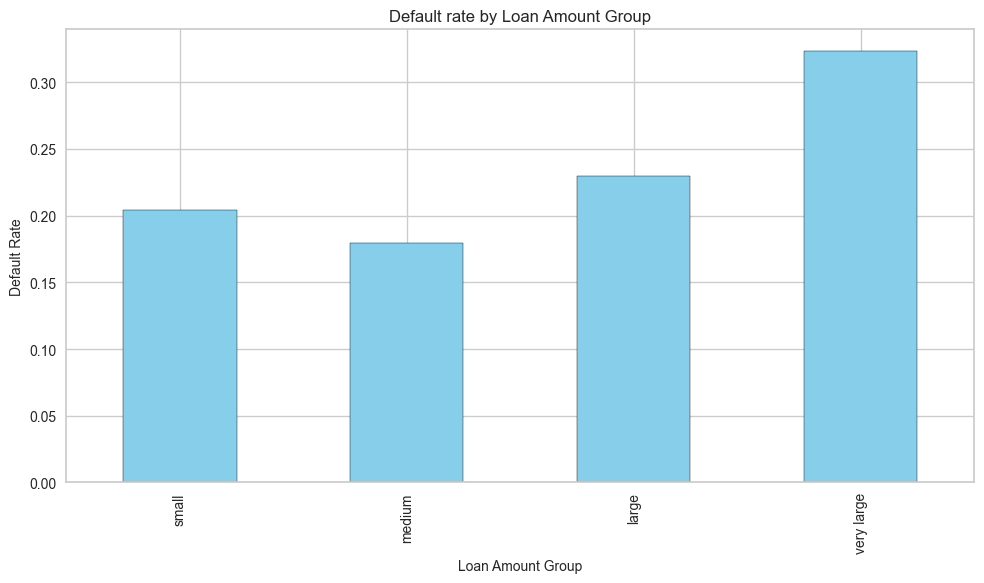

In [56]:
df['loan_amt_bins'] = pd.cut(df['loan_amnt'],
                                   bins=[0, 5000, 10000, 15000, float('inf')],
                                   labels=['small', 'medium', 'large', 'very large'])
amt_default_rate = df.groupby('loan_amt_bins')['loan_status'].mean()

plt.figure(figsize = (10,6))

amt_default_rate.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Default rate by Loan Amount Group', fontsize=12)
plt.xlabel("Loan Amount Group", fontsize=10)
plt.ylabel('Default Rate', fontsize=10)

plt.tight_layout()
plt.show()

In [46]:
# # Generate the bins with ranges
# _, income_bins = pd.qcut(df['person_income'], q=5, retbins=True)

# # Display the bin edges
# for i in range(len(income_bins) - 1):
#     print(f"{income_bins[i]:,.2f} to {income_bins[i+1]:,.2f} - {['Low', 'Below Average', 'Average', 'Above Average', 'High'][i]}")

4,000.00 to 35,000.00 - Low
35,000.00 to 49,000.00 - Below Average
49,000.00 to 63,000.00 - Average
63,000.00 to 86,000.00 - Above Average
86,000.00 to 6,000,000.00 - High


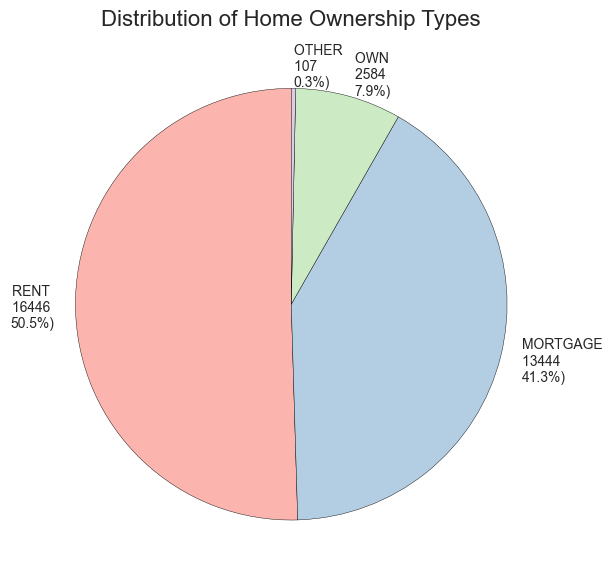

In [57]:
ownership_count = df.person_home_ownership.value_counts()
labels = [
    f"{index} \n{value} \n{value / ownership_count.sum() * 100:.1f}%)"
    for index, value in zip(ownership_count.index, ownership_count.values)
]

# Plot the pie chart
plt.figure(figsize=(8, 6))
plt.pie(
    ownership_count,
    labels=labels,
    autopct=None, 
    colors=plt.cm.Pastel1.colors,  
    startangle=90,  
    wedgeprops={"edgecolor": "black"},  
)

plt.title("Distribution of Home Ownership Types", fontsize=16)
plt.tight_layout()
plt.show()

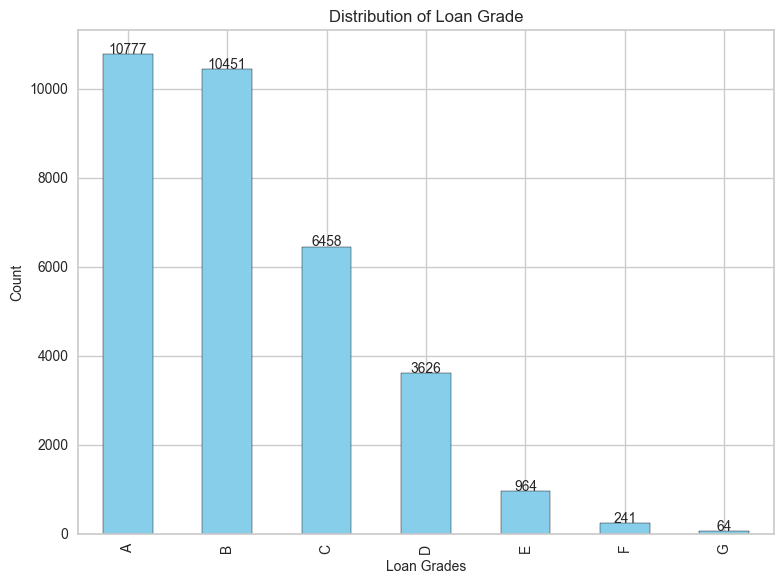

In [58]:
level_counts=df.loan_grade.value_counts()

plt.figure(figsize = (8,6))

level_counts.plot(kind = 'bar', color='skyblue', edgecolor='black')

for i,value in enumerate(level_counts.values):
    plt.text(i, value + 1, f"{value}", ha = "center", fontsize=10)
plt.title("Distribution of Loan Grade", fontsize=12)
plt.xlabel("Loan Grades", fontsize=10)
plt.ylabel("Count", fontsize=10)

plt.tight_layout()
plt.show()


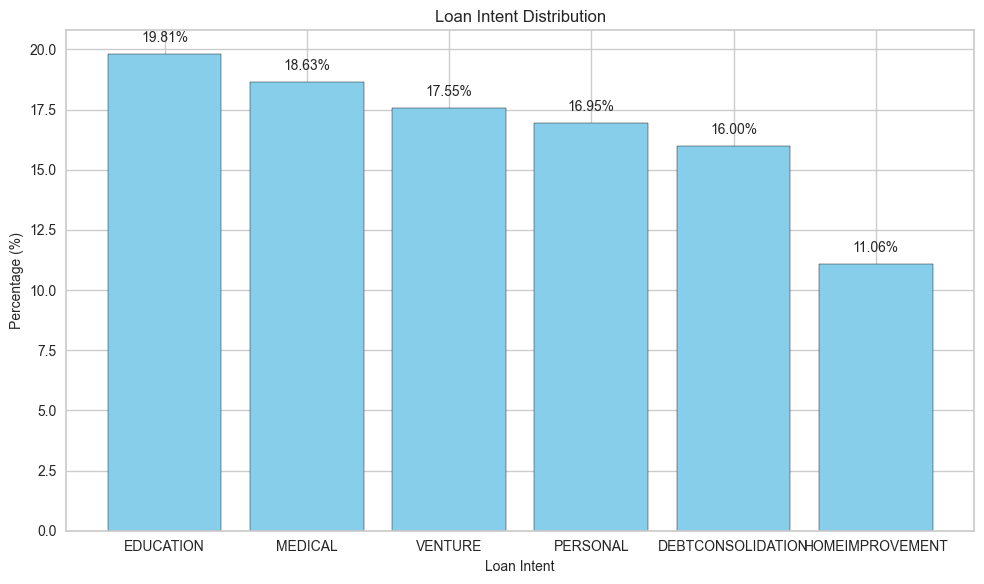

In [59]:
loan_intent_counts = df['loan_intent'].value_counts(normalize=True) * 100  

# Create the bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(
    loan_intent_counts.index,
    loan_intent_counts.values,
    color='skyblue',  
    edgecolor="black"
)

# Annotate the bars with percentages
for i, value in enumerate(loan_intent_counts.values):
    plt.text(
        i,
        value + 0.5,  
        f"{value:.2f}%",  
        ha="center",
        fontsize=10
    )

plt.title("Loan Intent Distribution", fontsize=12)
plt.xlabel("Loan Intent", fontsize=10)
plt.ylabel("Percentage (%)", fontsize=10)

plt.tight_layout()
plt.show()

# Outliers

In [60]:
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
age_bins                        22
income_bins                      0
loan_amt_bins                    0
dtype: int64

In [61]:
df.dropna(axis=0, inplace = True)
df.reset_index(inplace = True)

In [62]:
df.isnull().sum()

index                         0
person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
age_bins                      0
income_bins                   0
loan_amt_bins                 0
dtype: int64

In [63]:
df.describe()

,index,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,28619.000000,28619.000000,2.861900e+04,28619.000000,28619.000000,28619.000000,28619.000000,28619.000000,28619.000000
mean,16295.445543,27.713512,6.641797e+04,4.789406,9657.062616,11.039548,0.216674,0.169527,5.794263
std,9386.565494,6.162277,5.155042e+04,4.155496,6329.876381,3.229685,0.411986,0.106393,4.036041
min,0.000000,21.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,8163.500000,23.000000,3.945600e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,16289.000000,26.000000,5.581200e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,24438.500000,30.000000,8.000000e+04,7.000000,12500.000000,13.480000,0.000000,0.230000,8.000000
max,32580.000000,80.000000,2.039784e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [64]:
df = df.drop(df[df['person_age'] > 80].index, axis=0)

In [65]:
df

,index,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,age_bins,income_bins,loan_amt_bins
0,0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3,"(20, 25]",average,very large
1,1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2,"(20, 25]",low,small
2,2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3,"(20, 25]",low,medium
3,3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2,"(20, 25]",average,very large
4,4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4,"(20, 25]",average,very large
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28614,32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30,"(55, 60]",average,medium
28615,32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19,"(50, 55]",high,very large
28616,32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28,"(60, 65]",above average,very large
28617,32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26,"(55, 60]",high,large


In [66]:
df['age_bins'] = pd.cut(df['person_age'], bins=[20, 26, 36, 46, 56, 66], labels=['20-25', '26-35', '36-45', '46-55', '56-65'])

In [67]:
df = df.drop(df[df['person_emp_length'] > 60].index, axis=0)

In [68]:
df = df.drop(['index'], axis=1)
df.reset_index(inplace = True)
df = df.drop(['index'], axis=1)

In [69]:
# Create loan-to-income ratio
df['loan_to_income_ratio'] = df['loan_amnt'] / df['person_income']

# Create loan-to-employment length ratio
df['loan_to_emp_length_ratio'] =  df['person_emp_length']/ df['loan_amnt'] 

# Create interest rate-to-loan amount ratio
df['int_rate_to_loan_amt_ratio'] = df['loan_int_rate'] / df['loan_amnt']

df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,age_bins,income_bins,loan_amt_bins,loan_to_income_ratio,loan_to_emp_length_ratio,int_rate_to_loan_amt_ratio
0,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2,20-25,low,small,0.104167,0.005000,0.011140
1,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3,20-25,low,medium,0.572917,0.000182,0.002340
2,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2,20-25,average,very large,0.534351,0.000114,0.000435
3,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4,20-25,average,very large,0.643382,0.000229,0.000408
4,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2,20-25,low,small,0.252525,0.000800,0.002856
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28612,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30,56-65,average,medium,0.109434,0.000172,0.002269
28613,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19,46-55,high,very large,0.146875,0.000227,0.000425
28614,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28,56-65,above average,very large,0.460526,0.000086,0.000314
28615,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26,46-55,high,large,0.100000,0.000333,0.000765


In [70]:
data = df

# Data Modeling

In [165]:
X = df.drop(['loan_status'], axis =1)
Y = df['loan_status']

In [167]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=12)
print(x_train.shape,x_test.shape)

(22893, 17) (5724, 17)


In [168]:
x_train.reset_index(inplace = True)
x_test.reset_index(inplace = True)

In [173]:
ohe_colums = ['cb_person_default_on_file','loan_grade', 'person_home_ownership','loan_intent','income_bins','age_bins','loan_amt_bins']
ohe = OneHotEncoder()
ohe.fit(x_train[ohe_colums])

OneHotEncoder()

In [174]:
ohe.categories_

[array(['N', 'Y'], dtype=object),
 array(['A', 'B', 'C', 'D', 'E', 'F', 'G'], dtype=object),
 array(['MORTGAGE', 'OTHER', 'OWN', 'RENT'], dtype=object),
 array(['DEBTCONSOLIDATION', 'EDUCATION', 'HOMEIMPROVEMENT', 'MEDICAL',
        'PERSONAL', 'VENTURE'], dtype=object),
 array(['above average', 'average', 'below average', 'high', 'low'],
       dtype=object),
 array(['20-25', '26-35', '36-45', '46-55', '56-65', nan], dtype=object),
 array(['large', 'medium', 'small', 'very large'], dtype=object)]

In [175]:
merge_ohe_col = np.concatenate((ohe.categories_[0],
                                ohe.categories_[1],
                                ohe.categories_[2],
                                ohe.categories_[3],
                                ohe.categories_[4],
                                ohe.categories_[5],
                                ohe.categories_[6],))

merge_ohe_col

array(['N', 'Y', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'MORTGAGE', 'OTHER',
       'OWN', 'RENT', 'DEBTCONSOLIDATION', 'EDUCATION', 'HOMEIMPROVEMENT',
       'MEDICAL', 'PERSONAL', 'VENTURE', 'above average', 'average',
       'below average', 'high', 'low', '20-25', '26-35', '36-45', '46-55',
       '56-65', nan, 'large', 'medium', 'small', 'very large'],
      dtype=object)

In [176]:
ohe_train = pd.DataFrame(ohe.transform(x_train[ohe_colums]).toarray(), columns=merge_ohe_col)
ohe_test = pd.DataFrame(ohe.transform(x_test[ohe_colums]).toarray(),columns=merge_ohe_col)

In [177]:
X_new = pd.concat([ohe_train, x_train], axis=1)
X_new = X_new.drop(ohe_colums, axis=1)


X_new_test = pd.concat([ohe_test, x_test], axis=1)
X_new_test = X_new_test.drop(ohe_colums, axis=1)

X_new.head()
X_new.shape

(22893, 45)

In [178]:
X_new_test

,N,Y,A,B,C,D,E,F,G,MORTGAGE,...,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_to_income_ratio,loan_to_emp_length_ratio,int_rate_to_loan_amt_ratio
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,24,26000,0.0,4200,16.00,0.16,2,0.161538,0.000000,0.003810
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,23,55000,0.0,5500,11.71,0.10,4,0.100000,0.000000,0.002129
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,23,30000,3.0,3600,5.99,0.12,2,0.120000,0.000833,0.001664
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,23,60000,7.0,10750,7.88,0.18,3,0.179167,0.000651,0.000733
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,28,43500,12.0,4000,12.69,0.09,8,0.091954,0.003000,0.003172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5719,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,44,28000,15.0,8000,7.49,0.29,11,0.285714,0.001875,0.000936
5720,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,23,66000,5.0,6000,6.62,0.09,2,0.090909,0.000833,0.001103
5721,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,27,28000,3.0,6000,13.92,0.21,6,0.214286,0.000500,0.002320
5722,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,24,45000,3.0,2850,11.86,0.06,2,0.063333,0.001053,0.004161


In [179]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler

normal_col = ['person_income','person_age','person_emp_length', 'loan_amnt','loan_int_rate','cb_person_cred_hist_length','loan_percent_income', 'loan_to_emp_length_ratio',
       'int_rate_to_loan_amt_ratio']


scaler_normal = StandardScaler()
X_new.loc[:,normal_col] = scaler_normal.fit_transform(X_new.loc[:,normal_col])
X_new_test.loc[:,normal_col] = scaler_normal.transform(X_new_test.loc[:,normal_col])

In [180]:
X_new_test

,N,Y,A,B,C,D,E,F,G,MORTGAGE,...,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_to_income_ratio,loan_to_emp_length_ratio,int_rate_to_loan_amt_ratio
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,-0.604931,-0.822495,-1.185781,-0.863411,1.537516,-0.093180,-0.942614,0.161538,-0.710483,1.037858
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.767267,-0.225717,-1.185781,-0.657407,0.207324,-0.657311,-0.447824,0.100000,-0.710483,0.140001
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.767267,-0.740180,-0.440310,-0.958490,-1.566265,-0.469267,-0.942614,0.120000,0.062535,-0.108556
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,-0.767267,-0.122824,0.553652,0.174535,-0.980236,0.094864,-0.695219,0.179167,-0.106451,-0.605918
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.044411,-0.462370,1.796103,-0.895104,0.511191,-0.751333,0.541755,0.091954,2.072380,0.697496
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5719,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.641783,-0.781338,2.541574,-0.261244,-1.101163,1.129104,1.283939,0.285714,1.028807,-0.497334
5720,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,-0.767267,0.000647,0.056671,-0.578174,-1.370922,-0.751333,-0.942614,0.090909,0.062535,-0.408062
5721,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,-0.117924,-0.781338,-0.440310,-0.578174,0.892575,0.376929,0.046965,0.214286,-0.246672,0.242004
5722,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,-0.604931,-0.431502,-0.440310,-1.077339,0.253834,-1.033398,-0.942614,0.063333,0.265960,1.225867


# ML Classification Models

In [217]:
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
import lightgbm as lgb
from lightgbm import LGBMClassifier
from bayes_opt import BayesianOptimization
from sklearn.metrics import precision_score, accuracy_score, recall_score, confusion_matrix

In [208]:
knc = KNeighborsClassifier()
xgb = XGBClassifier()
cat = CatBoostClassifier(verbose=0) 
lgb = lgb.LGBMClassifier() 

In [209]:
clf = {
    'KN' : knc, 
    'xgb':xgb,
    'cat':cat,
    'lgb':lgb
}

In [210]:
def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)

    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    specificity = tn / (tn + fp)
    
    return accuracy, precision, recall, specificity

In [211]:
X_new = X_new.drop(columns=[col for col in X_new.columns if pd.isna(col)], axis=1)
X_new_test = X_new_test.drop(columns=[col for col in X_new_test.columns if pd.isna(col)], axis=1)

In [212]:
accuracy_scores = []
precision_scores = []
recall_scores = []
specificity_scores = []

for name,clf in clf.items():
    
    current_accuracy,current_precision, current_recall, current_specificity = train_classifier(clf, X_new,y_train,X_new_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    print("Recall - ",current_recall)
    print("Specificity - ",current_specificity)
    print()
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    recall_scores.append(current_recall)
    specificity_scores.append(current_specificity)

For  KN
Accuracy -  0.7982180293501048
Precision -  0.5476190476190477
Recall -  0.2658959537572254
Specificity -  0.9410591624196765

For  xgb
Accuracy -  0.9461914744933613
Precision -  0.964984552008239
Recall -  0.7737407101568952
Specificity -  0.9924662087303346

For  cat
Accuracy -  0.9482879105520615
Precision -  0.9800629590766002
Recall -  0.7712634186622626
Specificity -  0.9957899401728341

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 4989, number of negative: 17904
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002168 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2013
[LightGBM] [Info] Number of data points in the train set: 22893, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.217927 -> initscore=-1.277789
[LightGBM] 

# Hyperparameter Tuning

In [218]:
# Hyperparameter-tuning: Bayesian Optimization, bayes_opt
def lgbm_clf_bo(num_leaves, max_depth, learning_rate, min_child_weight, subsample, colsample_bytree):
    params_lgbm = {'objective': 'binary'}
    params_lgbm['num_leaves'] = round((2**round(max_depth))*num_leaves)
    params_lgbm['max_depth'] = round(max_depth)
    params_lgbm['learning_rate'] = learning_rate
    params_lgbm['min_child_weight'] = min_child_weight
    params_lgbm['subsample'] = subsample
    params_lgbm['colsample_bytree'] = colsample_bytree
    
    scores = cross_val_score(LGBMClassifier(random_state=12, **params_lgbm),
                             X_new, y_train, scoring='recall', cv=10).mean()
    return scores

params_lgbm ={
    'num_leaves':(0.5,0.9),
    'max_depth': (3, 15),
    'learning_rate': (0.005, 0.3),
    'min_child_weight':(1e-6, 1e-1),
    'subsample':(0.5, 1),
    'colsample_bytree':(0.5, 1)
}

# Run Bayesian Optimization
lgbm_bo = BayesianOptimization(lgbm_clf_bo, params_lgbm)
lgbm_bo.maximize(init_points=2, n_iter=20)

|   iter    |  target   | colsam... | learni... | max_depth | min_ch... | num_le... | subsample |
-------------------------------------------------------------------------------------------------
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 4490, number of negative: 16113
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001191 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2010
[LightGBM] [Info] Number of data points in the train set: 20603, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.217929 -> initscore=-1.277774
[LightGBM] [Info] Start training from score -1.277774
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Light

In [219]:
# Best hyperparameters
params_lgbm = lgbm_bo.max['params']
params_lgbm['max_depth'] = round(params_lgbm['max_depth'])
params_lgbm['num_leaves'] = round((2**round(params_lgbm['max_depth']))*params_lgbm['num_leaves'])
params_lgbm

{'colsample_bytree': 0.9800321666680674,
 'learning_rate': 0.29300100826461006,
 'max_depth': 8,
 'min_child_weight': 0.08605897054068601,
 'num_leaves': 132,
 'subsample': 0.8731153416152408}

# Training Final Model

In [220]:
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier


knn = KNeighborsClassifier()
cat = CatBoostClassifier(verbose=0)
lgb = LGBMClassifier()


ensemble = VotingClassifier(estimators=[('knn', knn),  ('cat', cat), ('lgb', lgb)], voting='soft',verbose=0)
current_accuracy,current_precision, current_recall, current_specificity = train_classifier(ensemble, X_new, y_train, X_new_test, y_test)

print("For ensemble")
print("Accuracy - ",current_accuracy)
print("Precision - ",current_precision)
print("Recall - ",current_recall)
print("Specificity - ",current_specificity)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 4989, number of negative: 17904
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003274 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2013
[LightGBM] [Info] Number of data points in the train set: 22893, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.217927 -> initscore=-1.277789
[LightGBM] [Info] Start training from score -1.277789
For ensemble
Accuracy -  0.9419986023759609
Precision -  0.9888765294771968
Recall -  0.7341040462427746
Specificity -  0.9977841790383337


In [221]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
from sklearn.feature_selection import RFE

clf = RandomForestRegressor()


clf.fit(X_new,y_train)

feature_scores = pd.Series(clf.feature_importances_, index=X_new.columns).sort_values(ascending=False)
feature_scores

loan_to_income_ratio          0.225938
loan_int_rate                 0.160633
RENT                          0.126244
person_income                 0.102103
index                         0.047241
person_emp_length             0.037474
MEDICAL                       0.032713
loan_to_emp_length_ratio      0.030383
int_rate_to_loan_amt_ratio    0.030199
DEBTCONSOLIDATION             0.028231
person_age                    0.026223
C                             0.024961
loan_percent_income           0.019343
D                             0.017292
cb_person_cred_hist_length    0.015439
loan_amnt                     0.013762
HOMEIMPROVEMENT               0.010068
OWN                           0.008772
MORTGAGE                      0.005253
EDUCATION                     0.004469
G                             0.003917
PERSONAL                      0.003901
VENTURE                       0.003577
26-35                         0.002135
OTHER                         0.001896
Y                        

# PyCaret

In [3]:
pip install pycaret

  Using cached pycaret-3.3.2-py3-none-any.whl.metadata (17 kB)
  Using cached pyod-2.0.3-py3-none-any.whl
  Using cached imbalanced_learn-0.13.0-py3-none-any.whl.metadata (8.8 kB)
  Using cached category_encoders-2.6.4-py2.py3-none-any.whl.metadata (8.0 kB)
  Using cached matplotlib-3.7.5-cp311-cp311-win_amd64.whl.metadata (5.8 kB)
  Using cached scikit_plot-0.3.7-py3-none-any.whl.metadata (7.1 kB)
  Using cached yellowbrick-1.5-py3-none-any.whl.metadata (7.7 kB)
  Using cached plotly_resampler-0.10.0-py3-none-any.whl.metadata (13 kB)
  Using cached statsmodels-0.14.4-cp311-cp311-win_amd64.whl.metadata (9.5 kB)
  Using cached sktime-0.26.0-py3-none-any.whl.metadata (29 kB)
  Using cached tbats-1.1.3-py3-none-any.whl.metadata (3.8 kB)
  Using cached pmdarima-2.0.4-cp311-cp311-win_amd64.whl.metadata (8.0 kB)
  Using cached sklearn_compat-0.1.3-py3-none-any.whl.metadata (18 kB)
  Using cached dash-2.18.2-py3-none-any.whl.metadata (10 kB)
  Using cached flask-3.0.3-py3-none-any.whl.metadat

In [4]:
from pycaret.classification import *

In [71]:
data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,age_bins,income_bins,loan_amt_bins,loan_to_income_ratio,loan_to_emp_length_ratio,int_rate_to_loan_amt_ratio
0,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2,20-25,low,small,0.104167,0.005000,0.011140
1,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3,20-25,low,medium,0.572917,0.000182,0.002340
2,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2,20-25,average,very large,0.534351,0.000114,0.000435
3,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4,20-25,average,very large,0.643382,0.000229,0.000408
4,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2,20-25,low,small,0.252525,0.000800,0.002856


In [72]:
model = setup(data = data, target = 'loan_status', session_id=123)

,Description,Value
0,Session id,123
1,Target,loan_status
2,Target type,Binary
3,Original data shape,"(28617, 18)"
4,Transformed data shape,"(28617, 43)"
5,Transformed train set shape,"(20031, 43)"
6,Transformed test set shape,"(8586, 43)"
7,Numeric features,10
8,Categorical features,7
9,Rows with missing values,0.1%


In [73]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.9372,0.9450,0.7293,0.9749,0.8342,0.7965,0.8094,3.8380
lightgbm,Light Gradient Boosting Machine,0.9353,0.9427,0.7235,0.9700,0.8287,0.7898,0.8028,0.2400
xgboost,Extreme Gradient Boosting,0.9347,0.9445,0.7341,0.9536,0.8294,0.7899,0.8003,0.1430
rf,Random Forest Classifier,0.9320,0.9298,0.7150,0.9613,0.8199,0.7792,0.7922,0.5260
gbc,Gradient Boosting Classifier,0.9284,0.9259,0.7085,0.9480,0.8108,0.7678,0.7803,0.7410
et,Extra Trees Classifier,0.9241,0.9199,0.7152,0.9160,0.8031,0.7569,0.7659,0.4040
dt,Decision Tree Classifier,0.8884,0.8431,0.7631,0.7331,0.7477,0.6761,0.6764,0.0930
ada,Ada Boost Classifier,0.8859,0.8983,0.6459,0.7895,0.7104,0.6403,0.6453,0.2770
lda,Linear Discriminant Analysis,0.8710,0.8831,0.6085,0.7492,0.6714,0.5923,0.5973,0.0900
ridge,Ridge Classifier,0.8645,0.8773,0.5403,0.7655,0.6334,0.5533,0.5660,0.0750


In [74]:
model = setup(data = data_original, target = 'loan_status', session_id=123) 

,Description,Value
0,Session id,123
1,Target,loan_status
2,Target type,Binary
3,Original data shape,"(32581, 12)"
4,Transformed data shape,"(32581, 26)"
5,Transformed train set shape,"(22806, 26)"
6,Transformed test set shape,"(9775, 26)"
7,Numeric features,7
8,Categorical features,4
9,Rows with missing values,12.1%


In [75]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.9356,0.9441,0.7240,0.9741,0.8306,0.7919,0.8052,4.0590
lightgbm,Light Gradient Boosting Machine,0.9350,0.9458,0.7230,0.9716,0.8291,0.7900,0.8032,0.2580
xgboost,Extreme Gradient Boosting,0.9335,0.9456,0.7343,0.9496,0.8280,0.7876,0.7977,0.1220
rf,Random Forest Classifier,0.9319,0.9288,0.7124,0.9671,0.8203,0.7795,0.7934,0.3480
gbc,Gradient Boosting Classifier,0.9274,0.9271,0.7033,0.9512,0.8086,0.7650,0.7784,0.6090
et,Extra Trees Classifier,0.9181,0.9135,0.6780,0.9270,0.7831,0.7341,0.7478,0.4620
dt,Decision Tree Classifier,0.8844,0.8396,0.7602,0.7244,0.7416,0.6672,0.6677,0.0630
ada,Ada Boost Classifier,0.8821,0.8976,0.6322,0.7861,0.7006,0.6283,0.6342,0.2470
lda,Linear Discriminant Analysis,0.8614,0.8658,0.5749,0.7324,0.6440,0.5595,0.5659,0.0590
ridge,Ridge Classifier,0.8571,0.8658,0.5031,0.7609,0.6056,0.5227,0.5395,0.0400


In [76]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [77]:
pred_holdout = predict_model(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,CatBoost Classifier,0.9388,0.9483,0.7403,0.9729,0.8408,0.8038,0.8153


In [78]:
# save pipeline
save_model(best, 'my_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['person_age', 'person_income',
                                              'person_emp_length', 'loan_amnt',
                                              'loan_int_rate',
                                              'loan_percent_income',
                                              'cb_person_cred_hist_length'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=n...
                                     include=['person_home_ownership',
                      

# Results

- Loan Grade A and B comprises of 65.2% of total
- Most of the People taking a loan don't own their own house
- People between age 60 to 70 are more likely to default loan.
- Most loans are requested for Educational and Medical puroses.
- People with Low Income and Very high Loan Amount of loan tend to default the loan.
